# Оценка неопределенностей в задаче линейной регрессии
## Задание:
Исследовать задачу регрессии по предложенным данным с использованием модели линейной регрессии. Допустимо порождение признаков (полиномиальных, экспоненциальных, логарифмических, etc.)

В решении ожидается наличие следующих ключевых составляющих:

-формулировка задачи, формулировка признакового описания объектов, формулировка функции ошибки, формулировка меры качества модели; формулировка меры неопределенности для параметров модели, меры качества и целевой переменной;
-исследование исходных данных на предмет скоррелированности признаков; фильтрация признаков; порождение признаков (при необходимости);
-оценка параметров модели;
-исследование на предмет оптимального размера bootstrap-выборок с точки зрения неопределенности оценки параметров модели;
-исследование на предмет оптимального количества bootstrap-выборок с точки зрения неопределенности оценки параметров модели;
-оценка средних значений и неопределенностей для параметров модели с использованием оптимальных количества и размера bootstrap-выборок;
-оценка качества модели;
-оценка неопределенности качества модели: оценка доверительного интервала для качества модели с уровнем доверия 0.95;
-аппроксмация целевой переменной на выборке вновь поступающих объектов;
-оценка доверительных интервалов (уровень доверия 0.95) на подмножестве объектов этой выборки (объем подмножества выбирается из соображений удобства выбранного способа отображения; варианты: гистограммы оценок целевой переменной для нескольких объектов, график средних (по bootstrap-выборкам) значений целевой переменной для всех объектов с отображенным вокруг них заливкой доверительным интервалом);
Визуализация:

распределение признаков
распределение целевой переменной
распределение (распределения) оценок параметров
распределение (распределения) оценок меры качества модели
(при возможности) визуализация оценок (моделью) значений целевой переменной с отображением доверительных интервалов
ВЫВОДЫ:

вывод о том, насколько модель подходит для описания данных (на основании соотношения меры качества на тренировочной и тестовой подвыборках.)
вывод о достаточности данных для оценки параметров модели (на основании величины неопределенности параметров)
вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения)
Реализация линейной регрессии может быть написана ТОЛЬКО с использованием библиотеки Numpy. Использование библиотек высокоуровневой компоновки решений на базе машинного обучения (scikit-learn и др.) не допускается за исключением порождения полиномиальных признаков.

##  -Формулировка задачи, формулировка признакового описания объектов, формулировка функции ошибки, формулировка меры качества модели; формулировка меры неопределенности для параметров модели, меры качества и целевой переменной;


In [226]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date
import datetime
from tqdm import tqdm

plt.rcParams['xtick.labelsize'] = 4
plt.rcParams['ytick.labelsize'] = 4

In [227]:
# Загрузка данных

X = np.load('X_train.npy')
X_inference = np.load('X_inference.npy')
y = np.load('y_train (1).npy')

В данной работе у нас задача типа "обучения с учителем", В данной задаче будем использовать модель линейной регрессии. ( Перейдем к объектам и целевой переменной (функции)


In [228]:
X.shape, y.shape, X_inference.shape

((10000, 4), (10000, 1), (100, 4))

In [229]:
X.dtype, y.dtype

(dtype('float64'), dtype('float64'))

In [230]:
#Видим,что у нас 4 признака и целевая переменная (действительные, рамерность 1)

#### Функция потерь - RMSE . Мера качества - RMSE .
 Мера неопределенности качества модели - RMSE (чем она меньше , тем модель лучше)

### Перейдем к созданию и обучению модели , а так же к исследованию bootstrap-выборок и ее визуализации.

Bootstrap - метод сэмплирования с возвратом:

Определиться с размером bootstrap-выборки Nb
Повторять до тех пор, пока размер bootstrap-выборки не достигнет Nb:
-Выбрать произвольный элемент исходной выборки, "вернуть" его на место.
-Добавить выбранный элемент в bootstrap-выборку.

In [231]:
# оформим в виде класса

class linear_regression:
    def __init__(self):
        self.theta = None
        pass
    
    def fit(self, X, y):
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        assert ((y.ndim == 2)&(y.shape[1] == 1)), "y should be 2-dimensional: (N of objects, one column)"
        
        # attaching ones as first column-vector - x[:,0]
        X_0 = np.ones((X.shape[0], 1), dtype=np.float)
        X_matrix = np.concatenate([X_0, X], axis=1)
        
        # making y_train of shape (N,1)
        y_column = np.squeeze(np.asarray(y)).reshape((-1,1))
        
        m1 = np.dot(X_matrix.T, X_matrix)
        m2 = np.linalg.inv(m1)
        m3 = np.dot(m2, X_matrix.T)
        theta_star = np.dot(m3, y_column)
        self.theta = theta_star
    
    def predict(self, X):
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        assert self.theta is not None, "theta is None. perhaps, fit the model first."
        
        X_0 = np.ones((X.shape[0], 1))
        X_matrix = np.concatenate([X_0, X], axis=1)
        y_pred = np.dot(X_matrix, self.theta)
        return y_pred

Графики распределения всех признаков от целевой переменной (->вид зависимости)

In [232]:
#plt.figure(figsize=(16,9), dpi=300)
#plt.scatter(X[:, 0], y, color = 'black', label = 'data1', s = 0.2)
#plt.scatter(X[:, 1], y, color = 'green', label = 'data2', s = 0.05)
#plt.legend()

In [233]:
#plt.figure(figsize=(16,9), dpi=300)
#plt.scatter(X[:, 2], y, color = 'blue', label = 'data3', s = 0.2)
#plt.legend()

In [234]:
#plt.figure(figsize=(16,9), dpi=300)
#plt.scatter(X[:, 3], y, color = 'red', label = 'data4', s = 0.2)
#plt.legend()

In [264]:
# Определим также функцию, которая строит визуализацию наших бутстрап-выборок:
def bootstrap_sample_size_plot(X, y, B, sample_size, def_font_size = 6, def_linewidth = 0.5):
    # Генерируем линейную регрессию, получаем параметр Θ:
    theta_bootstrap = []
    for i in tqdm(range(B), total=B):
        X_train, y_train = sample_bootstrap(X, y, sample_size = sample_size)
        lr = linear_regression()
        lr.fit(X_train,y_train)
        theta_bootstrap.append(np.copy(lr.theta))
    theta_bsarray = np.concatenate([t.T for t in theta_bootstrap], axis=0)
    
    #А теперь строим график:
    fig = plt.figure(figsize=(4, 6), dpi=300)
    for i in range(theta.shape[0]):
        plt.subplot(3,2, i+1)
        plt.title("$\\theta_%d$" % i, fontdict = {'fontsize': def_font_size})
    
        h_counts, h_bins, P = plt.hist(theta_bsarray[:,i], bins=30, color='white', ec="black", linewidth = def_linewidth)
        mean_theta_i = np.mean(theta_bsarray[:,i])
        std_theta_i = np.std(theta_bsarray[:,i])
    
        plt.vlines(mean_theta_i, 0, h_counts.max(), color='magenta')
        plt.vlines(theta[i,0], 0, h_counts.max(), color='green')
        plt.text(mean_theta_i, 3*h_counts.max()/4, '$mean(\\theta_%d) = %.3f$' % (i, mean_theta_i), fontsize = def_font_size)
        plt.text(mean_theta_i, 2*h_counts.max()/4, '$std(\\theta_%d) = %.3f$' % (i, std_theta_i), fontsize = def_font_size)
        plt.text(mean_theta_i, 1*h_counts.max()/4, '$\\theta_%d = %.3f$' % (i, theta[i,0]), fontsize = def_font_size, color='green')
    
    plt.tight_layout()

In [235]:
# реализовать функцию bootstrap-сэмплирования
# размер полного массива данных— B точек, а размеры бутстрап-выборок N=10,100,200

def sample_bootstrap(X, y, sample_size, return_OOB_sample = False):
    sample_indices = np.random.randint(0, X.shape[0], sample_size)
    if return_OOB_sample:
        oob_indices = np.array([i for i in np.arange(0, X.shape[0], 1, dtype=int) if i not in sample_indices])
        return X[sample_indices, :], y[sample_indices, :], X[oob_indices, :], y[oob_indices, :]
    else:
        return X[sample_indices, :], y[sample_indices, :]

In [236]:
#кол-во бутстрап-выборок (B), размер bootstrap-выборки (Nb)
#B = 1000
#Nb = 2500

In [237]:
# Определим функцию, которая возвращает массив бутстрап-выборки:

def bootstrap_sample_size(X, y, B, sample_size):
    # Генерируем линейную регрессию, получаем параметр Θ:
    
    theta_bootstrap = []
    for i in tqdm(range(B), total=B):
        X_train, y_train = sample_bootstrap(X, y, sample_size = sample_size)
        lr = linear_regression()
        lr.fit(X_train,y_train)
        theta_bootstrap.append(np.copy(lr.theta))
    theta_bsarray = np.concatenate([t.T for t in theta_bootstrap], axis=0)
    return theta_bsarray

In [238]:
# Визуализация вычисления неопределённостей модели на бутстрап-выборках
sample_size = 10
theta_values_curr_sample_size = []

for i in tqdm(range(B), total=B):
    Xtrain,ytrain = sample_bootstrap(X,y, sample_size=sample_size)
    lr = linear_regression()
    lr.fit(Xtrain,ytrain)
    theta_values_curr_sample_size.append(np.copy(lr.theta))

100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 12533.41it/s]


In [239]:
theta_values_curr_sample_size = np.concatenate([t.T for t in theta_values_curr_sample_size], axis=0)
theta_values_curr_sample_size.shape

(200, 5)

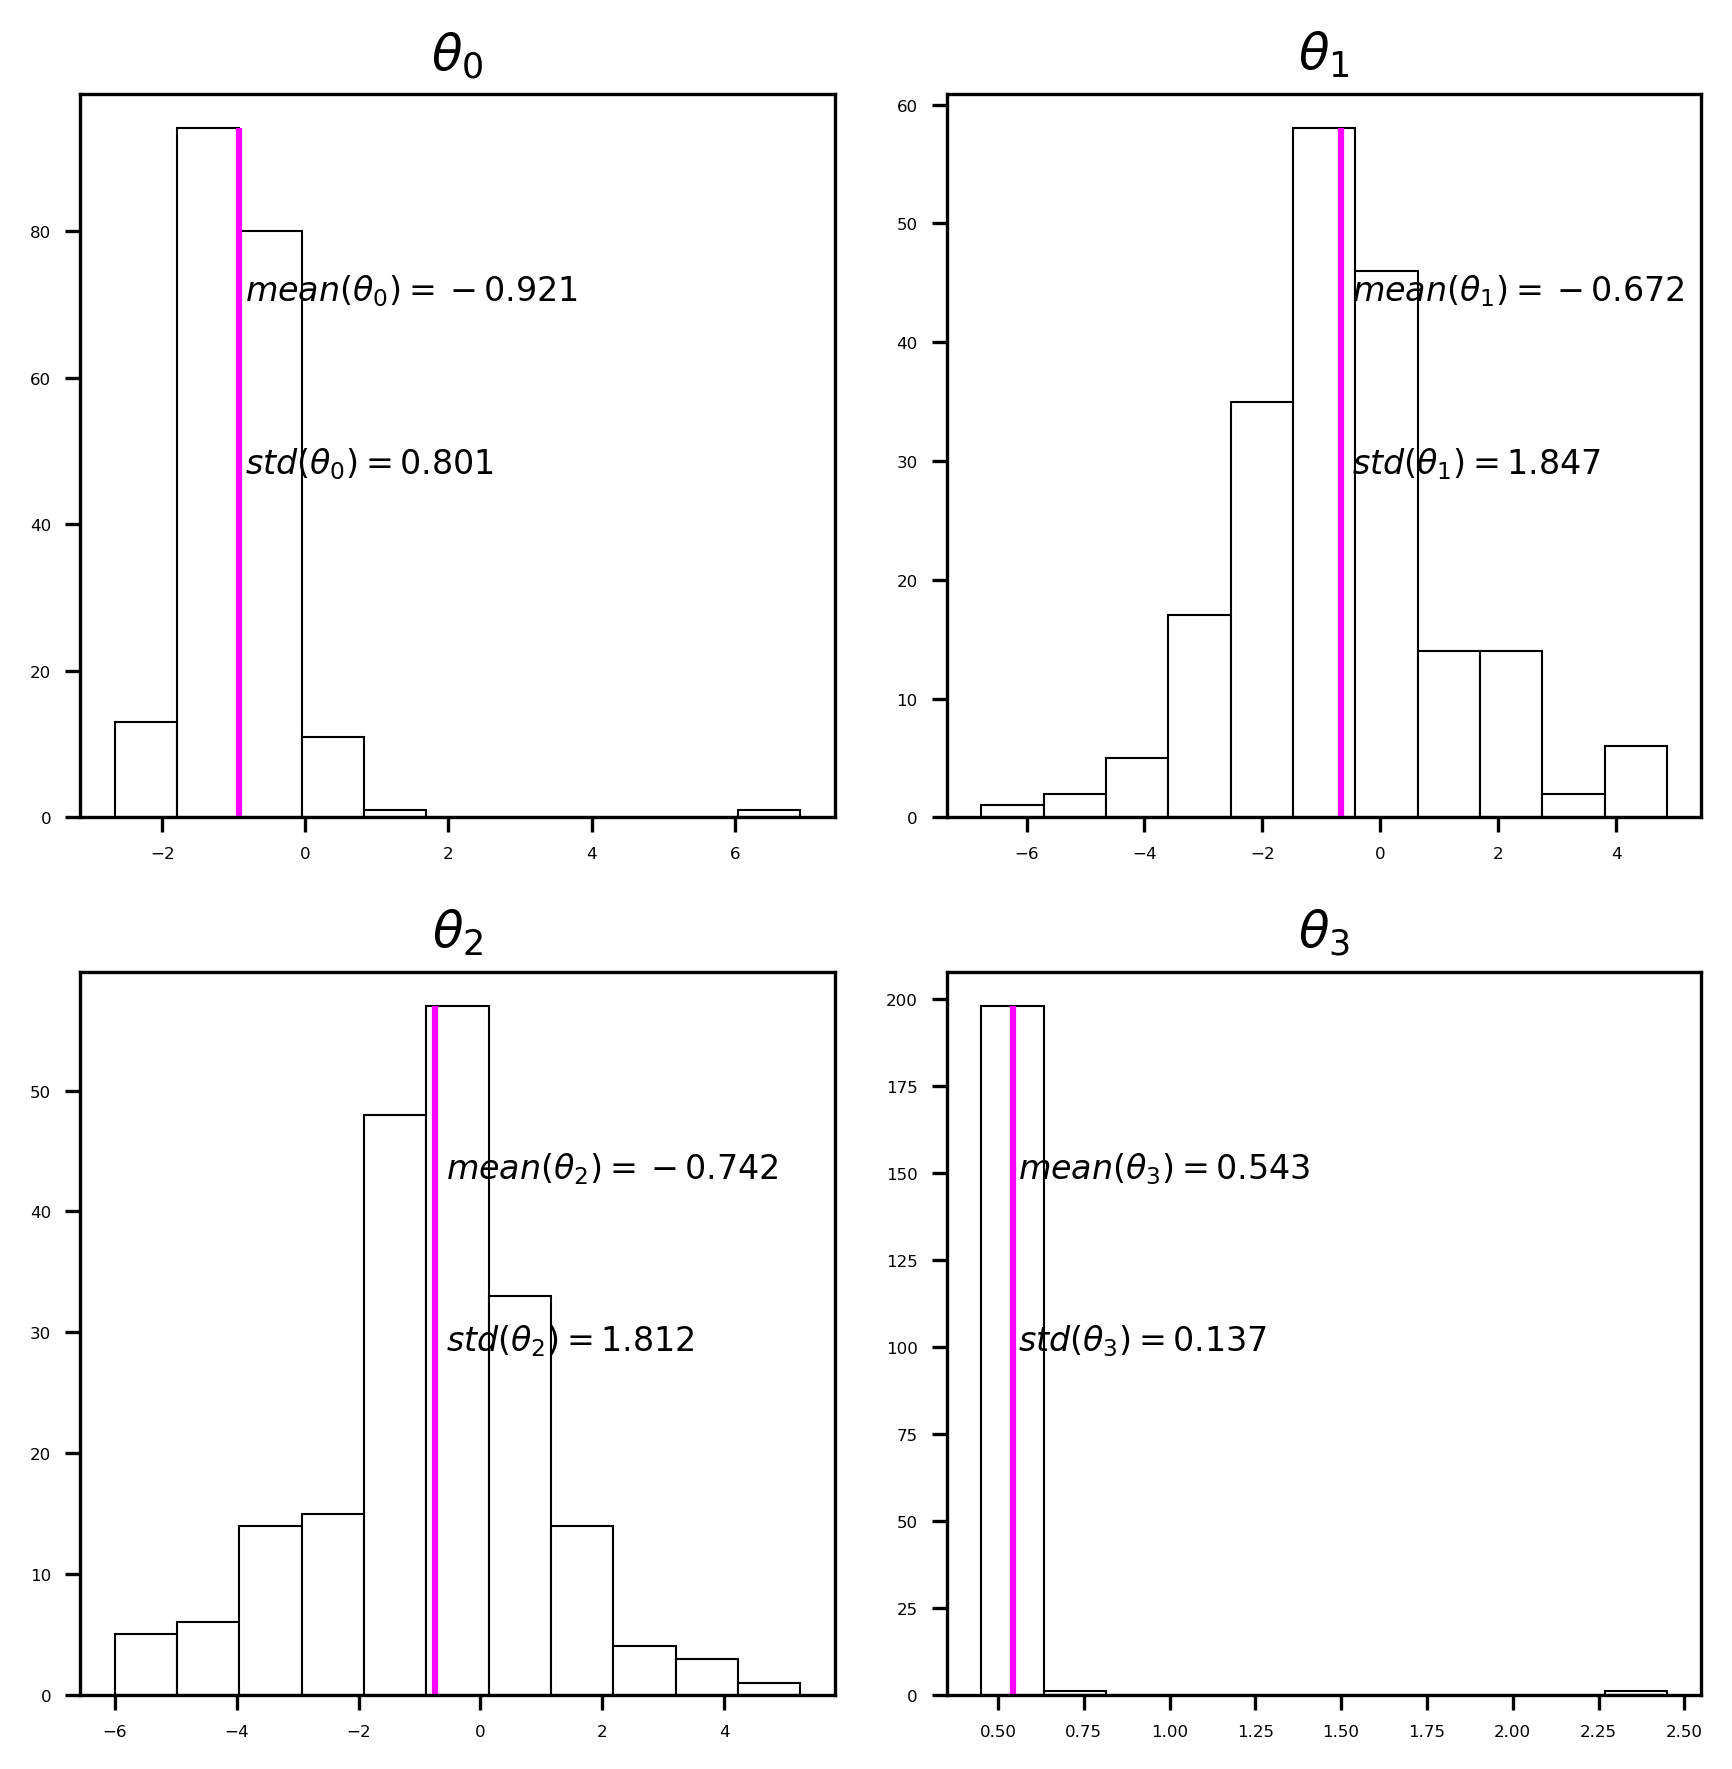

In [240]:
f = plt.figure(figsize=(6,6), dpi=300)
for i in range(4):
    plt.subplot(2,2, i+1)
    h_counts,h_bins,_ = plt.hist(theta_values_curr_sample_size[:,i], bins=11, color='white', ec="black", linewidth=0.5)
    plt.title("$\\theta_%d$" % i)
    mean_theta_i = np.mean(theta_values_curr_sample_size[:,i])
    std_theta_i = np.std(theta_values_curr_sample_size[:,i])
    plt.vlines(mean_theta_i, 0, h_counts.max(), color='magenta')
    plt.text(mean_theta_i+std_theta_i/10, 3*h_counts.max()/4, '$mean(\\theta_%d) = %.3f$' % (i, mean_theta_i), fontsize=8, weight='bold')
    plt.text(mean_theta_i+std_theta_i/10, 2*h_counts.max()/4, '$std(\\theta_%d) = %.3f$' % (i, std_theta_i), fontsize=8, weight='bold')
plt.tight_layout()

In [241]:
sample_size = 100
theta_values_curr_sample_size = []
for i in tqdm(range(B), total=B):
    Xtrain,ytrain = sample_bootstrap(X,y, sample_size=sample_size)
    lr = linear_regression()
    lr.fit(Xtrain,ytrain)
    theta_values_curr_sample_size.append(np.copy(lr.theta))

100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 12388.11it/s]


In [242]:
theta_values_curr_sample_size = np.concatenate([t.T for t in theta_values_curr_sample_size], axis=0)
theta_values_curr_sample_size.shape

(200, 5)

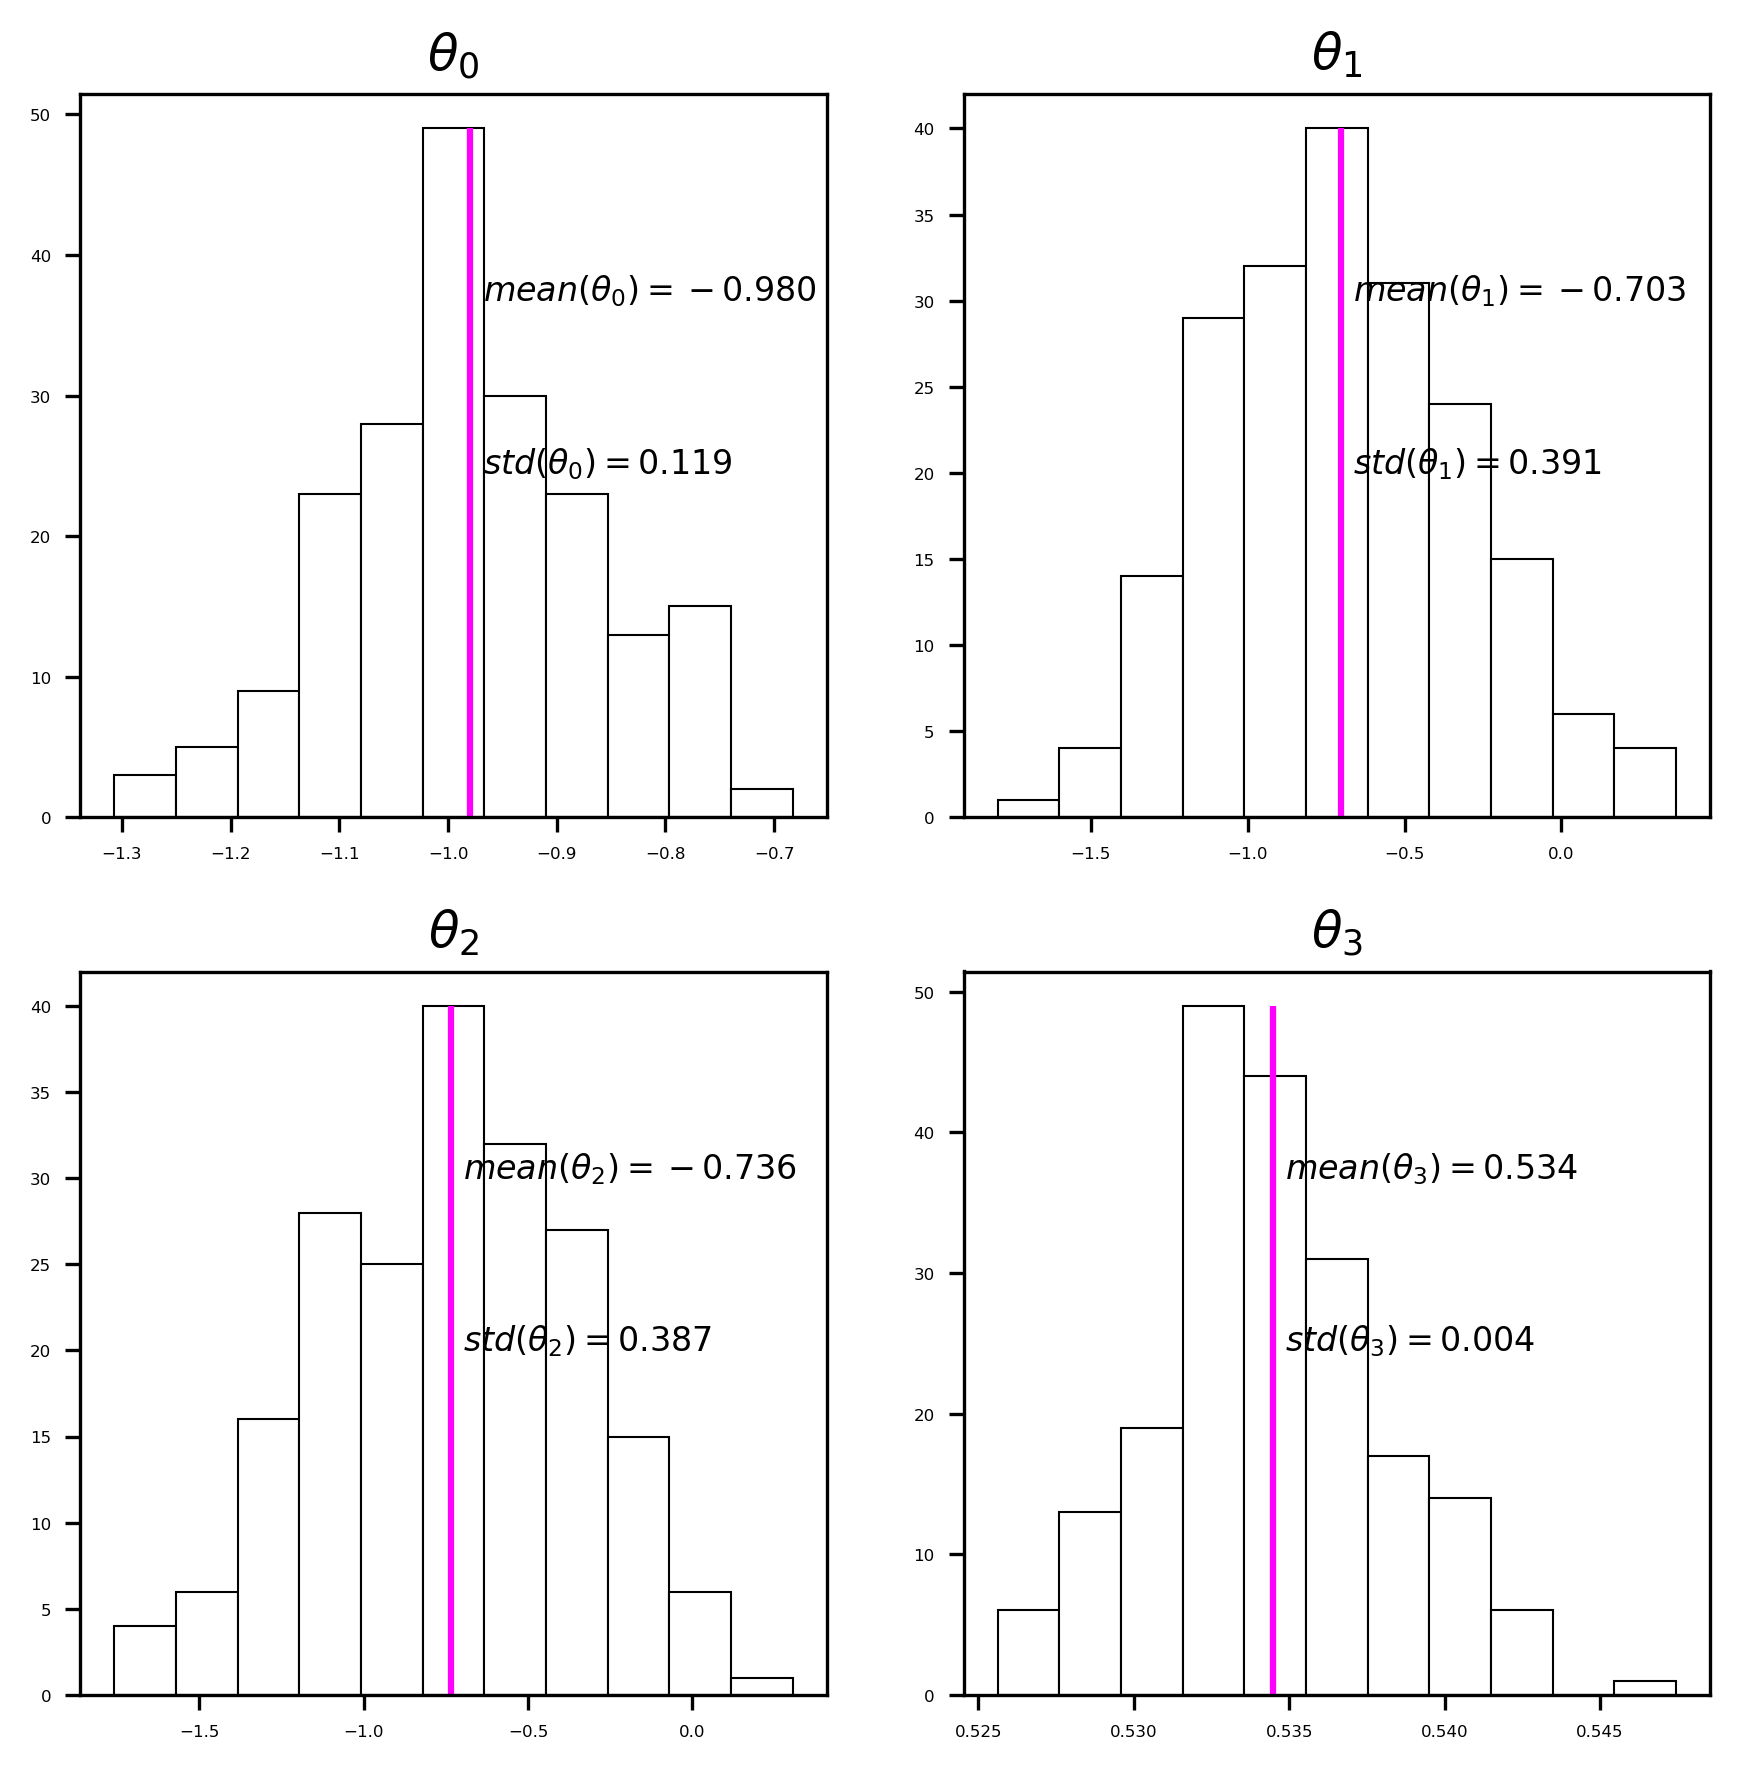

In [243]:
f = plt.figure(figsize=(6,6), dpi=300)
for i in range(4):
    plt.subplot(2,2, i+1)
    h_counts,h_bins,_ = plt.hist(theta_values_curr_sample_size[:,i], bins=11, color='white', ec="black", linewidth=0.5)
    plt.title("$\\theta_%d$" % i)
    mean_theta_i = np.mean(theta_values_curr_sample_size[:,i])
    std_theta_i = np.std(theta_values_curr_sample_size[:,i])
    plt.vlines(mean_theta_i, 0, h_counts.max(), color='magenta')
    plt.text(mean_theta_i+std_theta_i/10, 3*h_counts.max()/4, '$mean(\\theta_%d) = %.3f$' % (i, mean_theta_i), fontsize=8, weight='bold')
    plt.text(mean_theta_i+std_theta_i/10, 2*h_counts.max()/4, '$std(\\theta_%d) = %.3f$' % (i, std_theta_i), fontsize=8, weight='bold')
plt.tight_layout()

In [244]:
sample_size = 200
theta_values_curr_sample_size = []
for i in tqdm(range(B), total=B):
    Xtrain,ytrain = sample_bootstrap(X,y, sample_size=sample_size)
    lr = linear_regression()
    lr.fit(Xtrain,ytrain)
    theta_values_curr_sample_size.append(np.copy(lr.theta))

100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 10509.93it/s]


На основании величины неопределенности параметров, указанных на графиках выше, можно сделать вывод о достаточности данных для оценки параметров модели

## Неопределенность параметров в зависимости от размера bootstrap-выборки


In [245]:
# Построим график зависимости  std(𝜃) от N для заданных значений N.
theta_values_per_sample_size = []
#test_range_for_bs = [10, 20, 25, 30, 35, 40, 50]
test_range_for_bs = [10, 25, 50, 100, 200, 500, 1000, 2000, 4000, 10000]
for sample_size in test_range_for_bs:
    theta_values_curr_sample_size = []
    for i in tqdm(range(B), total = B):
        X_train, y_train = sample_bootstrap(X, y, sample_size = sample_size)
        lr = linear_regression()
        lr.fit(X_train,y_train)
        theta_values_curr_sample_size.append(np.copy(lr.theta))
    theta_values_curr_sample_size = np.concatenate([t.T for t in theta_values_curr_sample_size], axis=0)
    theta_values_per_sample_size.append({'sample_size': sample_size, 'theta_values': theta_values_curr_sample_size})

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1200.63it/s]


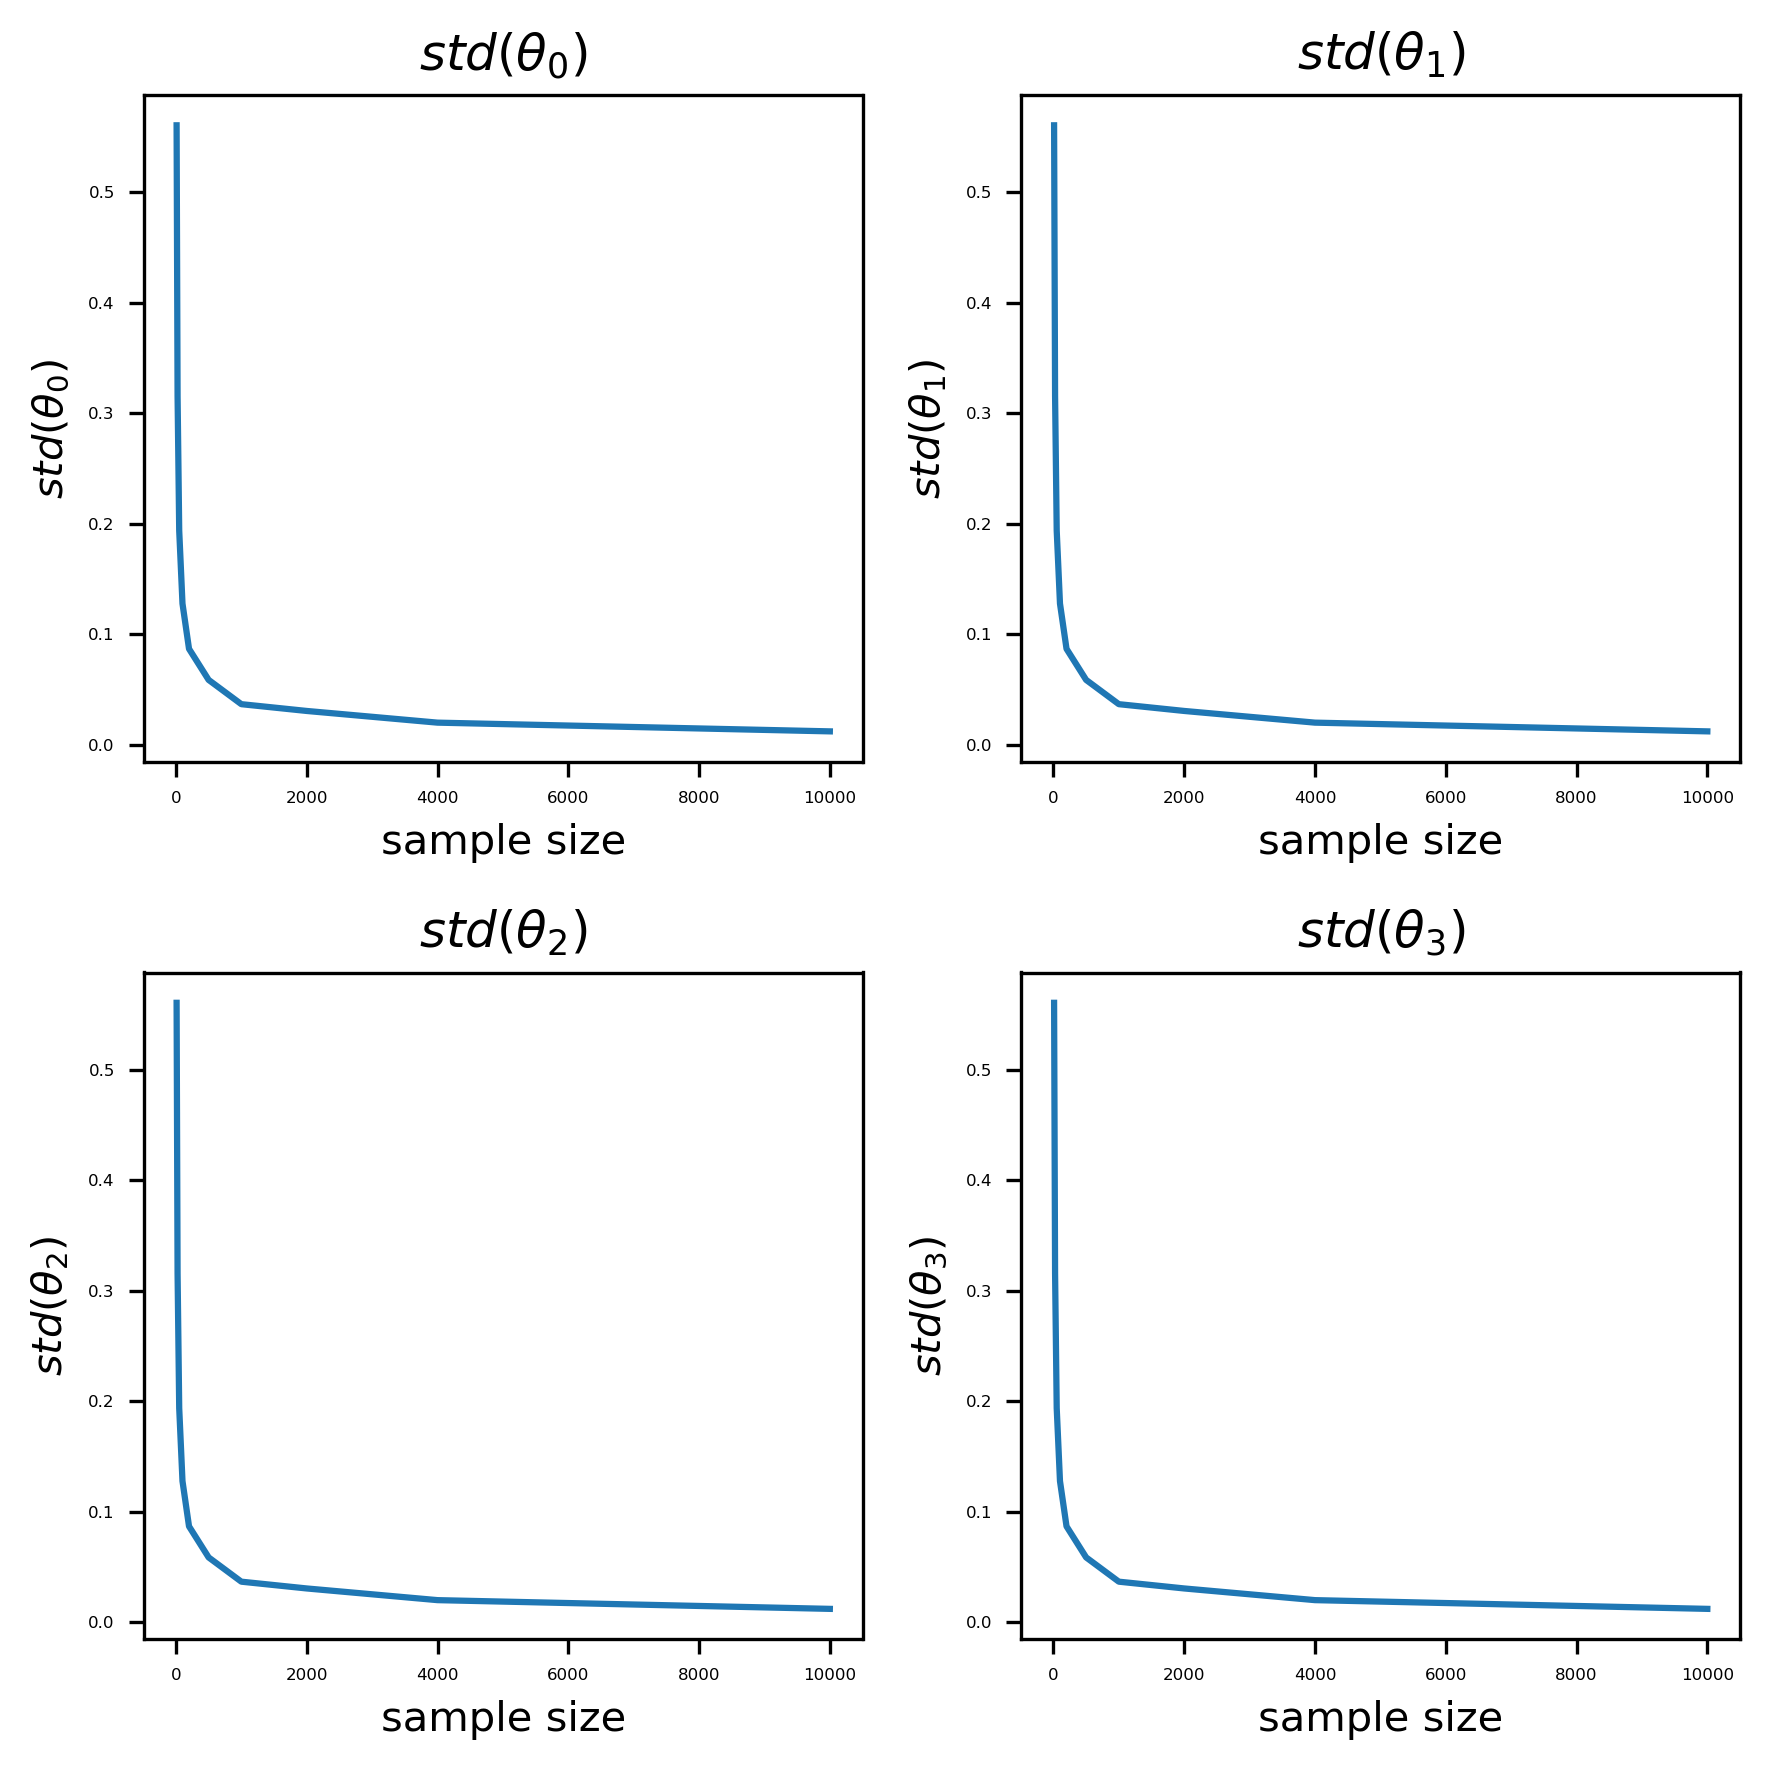

In [246]:
f = plt.figure(figsize=(6,6), dpi=300)
for i in range(4):
    _ = plt.subplot(2,2,i+1)
    _ = plt.plot([t['sample_size'] for t in theta_values_per_sample_size],
                 [np.std(t['theta_values'][:,0]) for t in theta_values_per_sample_size],
                 label='$std(\\theta_%d)$' % i)
    _ = plt.ylabel('$std(\\theta_%d)$' % i)
    _ = plt.xlabel('sample size')
    _ = plt.title('$std(\\theta_%d)$' % i)
plt.tight_layout()

In [247]:
# Начиная с размера выборки, равной 1000, модель начинает насыщаться. Можно ожидать, что начиная с этого размера выборки среднее значение 𝜃 попадёт в доверительный интервал.

In [248]:
#Доверительный интервал | По условию составляет 95%. То есть это такой интервал в окрестности среднего значения распределения нашей величины, в который попадут 95% измерений.

## Оценка качества модели

In [249]:
#надо расчитать MSE (сред.кв.ош),сделаем оценку
lr = linear_regression()
lr.fit(X,y)
theta = lr.theta
#ф-ия потерь для обуч нобора
y_learn = lr.predict(X)
mean_error_0 = np.mean(y-y_learn)
MSE_0 = np.std((y-y_learn))
print(mean_error_0)
print(MSE_0)

2.5995205987783266e-15
0.7117100500481706


In [250]:
#Сравним функцию ошибок от бутстрап-выборки с такой же от тестовой выборки.
random_ind = np.random.permutation(X.shape[0])
random_index = random_ind[:150]

X_test = np.squeeze(X[[random_index],:])
X_00 = np.ones((X_test.shape[0], 1))
y_test = y[random_index]

y_pred = lr.predict(X_test)
MSE_test = np.std((y_pred-y_test))
print(MSE_test)

0.6499888460646358


Значения вроде как близки , но по ощущениям должно быть так,что ошибка у бутстрап-выборки должна быть выше ,а получалось наоборот
### ????

In [251]:
# оценим неопредленность качества модели
MSE_bs = []
for i in range(100):
    X_bs, y_bs = sample_bootstrap(X, y, 150)
    y_pred1 = lr.predict(X_bs)
    MSE = np.std((y_pred1-y_bs))
    MSE_bs.append(MSE)

MSE_mean_2 = np.mean((MSE_bs))
MSE_mse_2 = np.std((MSE_bs))

print(MSE_mse_2)

0.037443899944494916


## Аппроксимация целевой переменной на выборке вновь поступающих объектов

In [252]:
#X_inference

In [253]:
X_inference.shape

(100, 4)

In [254]:
X_inference_0 = np.ones((X_inference.shape[0],1))
X_inference_new = np.concatenate([X_inference_0, X_inference], axis = 1)
Y_inference_approximated = np.dot(X_inference_new, theta)

No handles with labels found to put in legend.


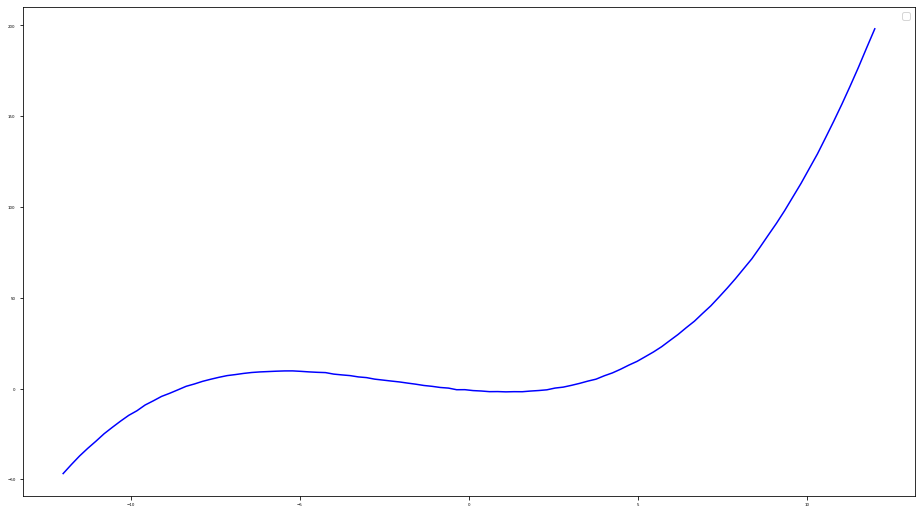

In [268]:
fig = plt.figure(figsize=(16, 9))
P = plt.plot(X_inference_new[:, 1], Y_inference_approximated, color = 'blue')
P = plt.legend()


No handles with labels found to put in legend.


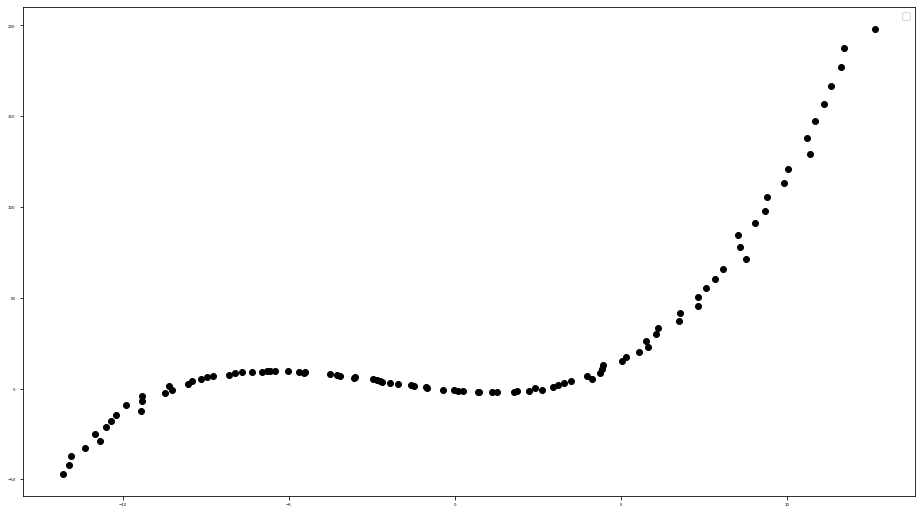

In [259]:
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_inference_new[:, 2], Y_inference_approximated, color = 'black')
plt.legend()

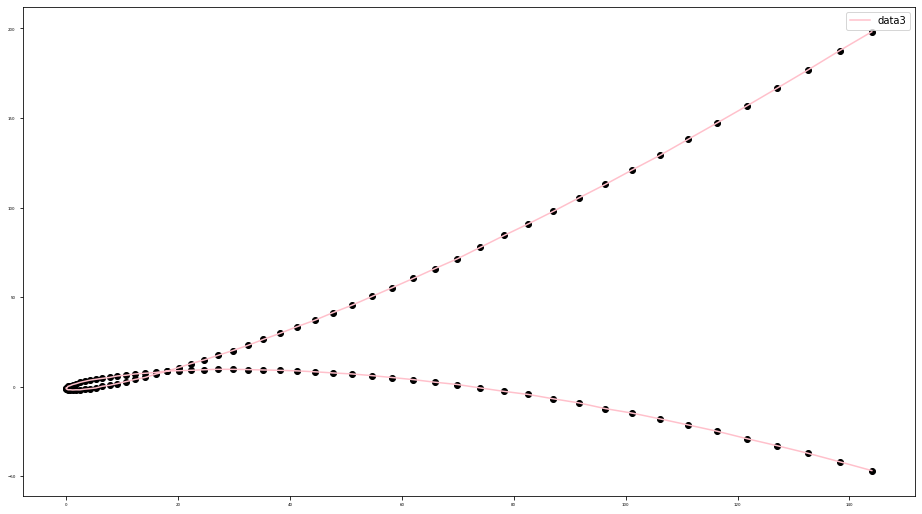

In [256]:
fig = plt.figure(figsize=(16, 9))
plt.plot(X_inference_new[:, 3], Y_inference_approximated, color = 'pink', label = 'data3')
plt.scatter(X_inference_new[:, 3], Y_inference_approximated, color = 'black')
plt.legend()

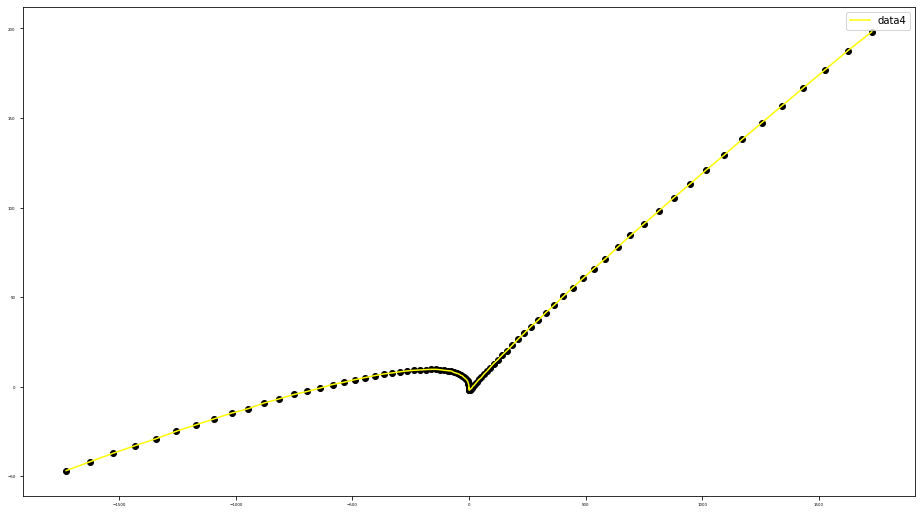

In [257]:
fig = plt.figure(figsize=(16, 9))
plt.plot(X_inference_new[:, 4], Y_inference_approximated, color = 'yellow', label = 'data4')
plt.scatter(X_inference_new[:, 4], Y_inference_approximated, color = 'black')
plt.legend()

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1419.38it/s]


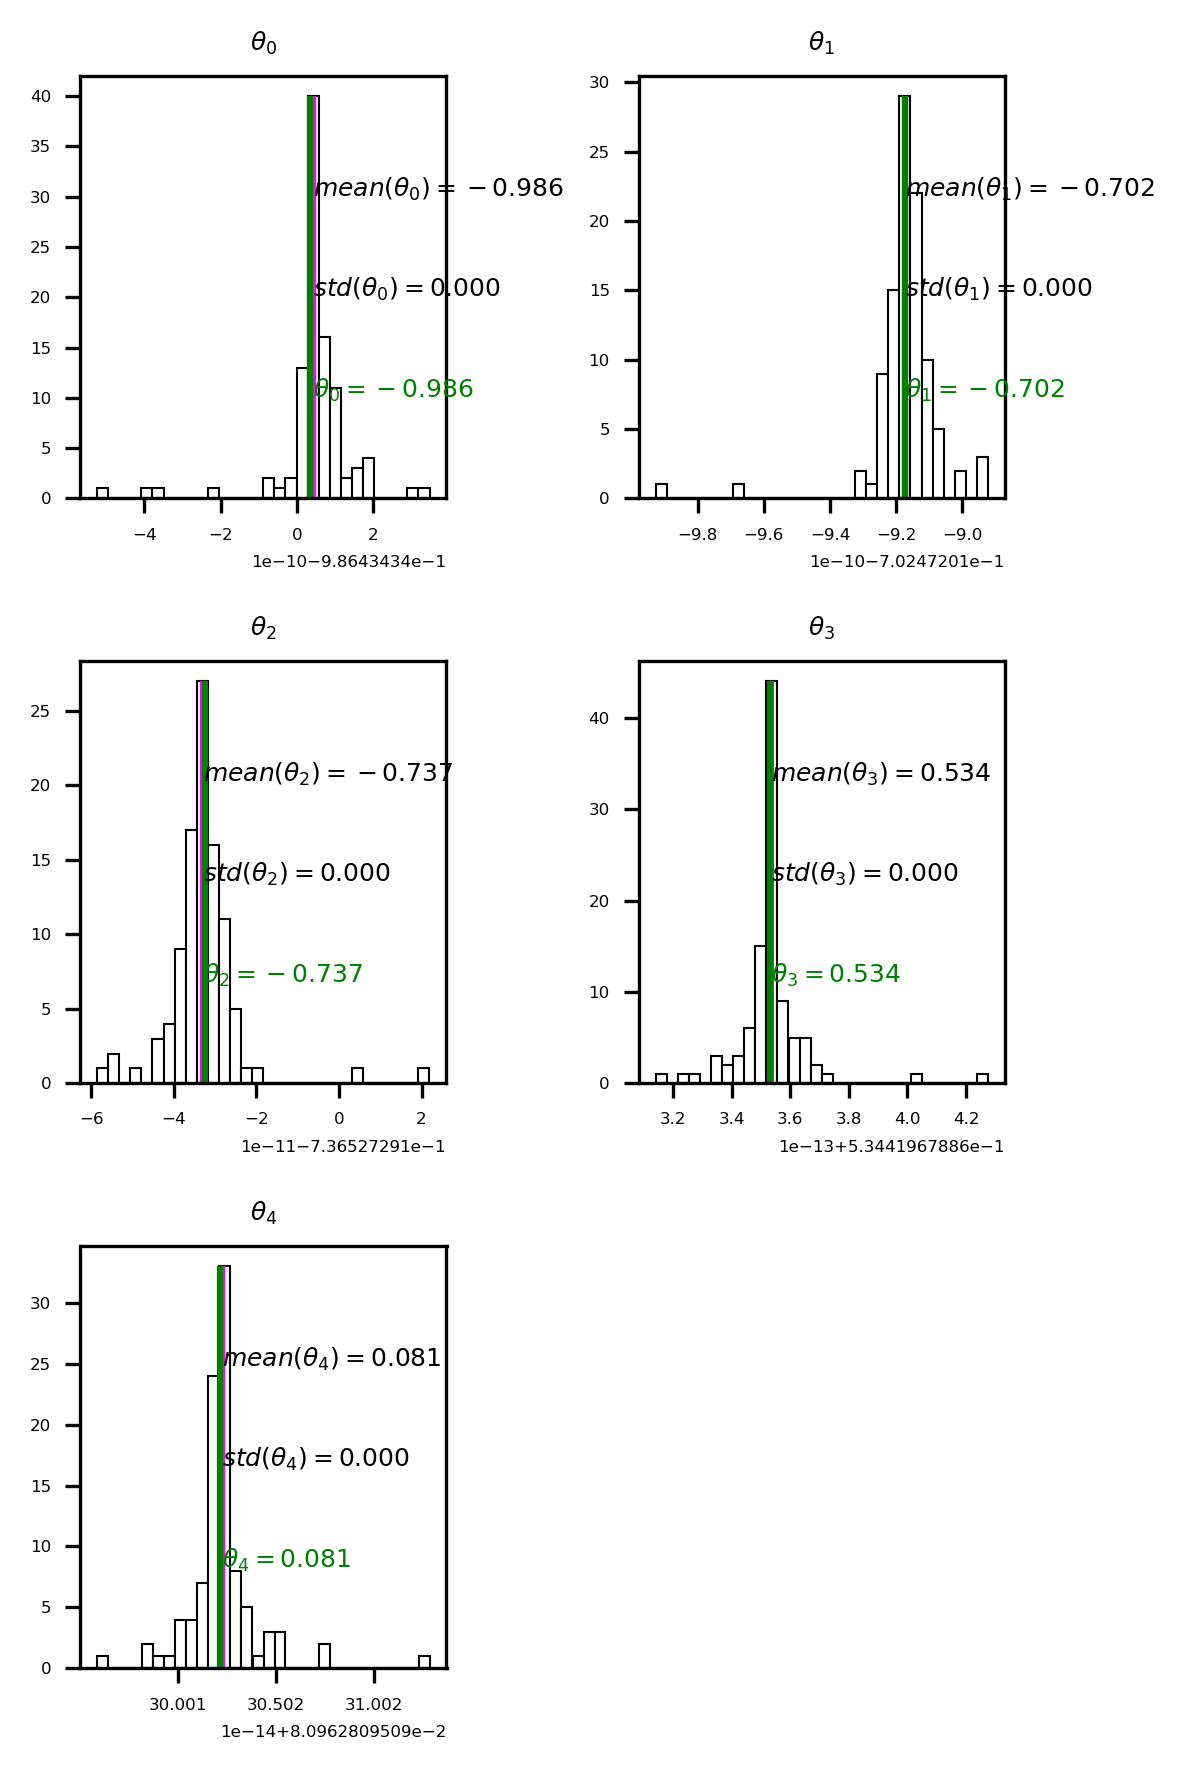

In [269]:
P = bootstrap_sample_size_plot(X_inference, Y_inference_approximated, 100, 10)

Переобучение:
(Нежелательное) явление, при котором качество модели, оцениваемое на тренировочной выборке, сильно отличается в лучшую сторону от качества на вновь поступающих примерах.

Нередко бывает, что переобучение обусловлено неверным соотношением выразительной способности модели и количества обучающих данных: модель выбрана слишком "сильная", в процессе обучения способна усвоить структуру данных.

Недообучение
Альтернативное (нежелательное) поведение модели.

Явление, при котором качество модели, оцениваемое на тренировочной выборке и на вновь поступающих примерах сравнительно невелико и отличается не сильно.

Характерной ситуацией, в которой может наблюдаться недообучение, является выбор слишком слабой модели, неспособной описать все особенности данных тренировочной выборки. В этом случае говорят, что выразительная способность модели низка.

####   Если все же говорить про переобучение или недообучения , можно предположить ,что этих явлений мы не наблюдаем и модель достаточно выразительна
